Project 5: Time Series Forecasting for Stock Prices

Description: Using historical stock prices of TCS to create a time series forecasting model, like ARIMA or LSTM, to predict future prices

Step 1:Loading the Data

In [1]:
import pandas as pd

# Load the stock price data
file_path = r"C:\Users\HP\Desktop\INTERNSHIP\TCS.NS.csv"
data = pd.read_csv(file_path)

# Check the first few rows of the data
print(data.head())


         Date       Open       High        Low      Close  Adj Close    Volume
0  2002-08-12  38.724998  40.000000  38.724998  39.700001  29.519140  212976.0
1  2002-08-13  39.750000  40.387501  38.875000  39.162498  29.119476  153576.0
2  2002-08-14  39.250000  39.250000  35.724998  36.462502  27.111877  822776.0
3  2002-08-15  36.462502  36.462502  36.462502  36.462502  27.111877       0.0
4  2002-08-16  36.275002  38.000000  35.750000  36.375000  27.046812  811856.0


Step 2:Preprocessing the Data

In [16]:
# Check the column names in the dataset
print(data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


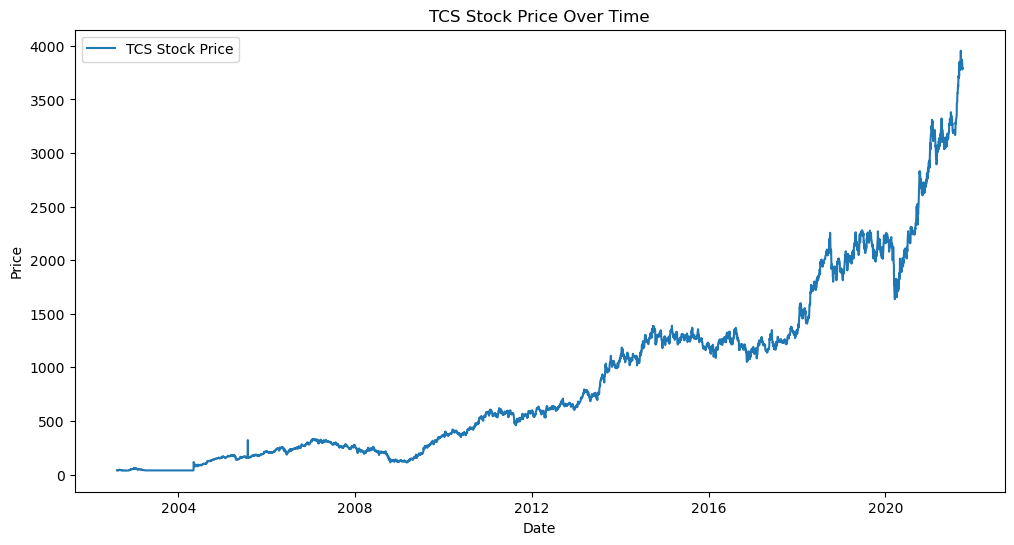

In [24]:
import matplotlib.pyplot as plt

# If the date is the index, we can directly convert it to datetime if needed
data.index = pd.to_datetime(data.index)

# Now, you can proceed with the analysis
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='TCS Stock Price')
plt.title('TCS Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Step 3:ARIMA Model for Forecasting

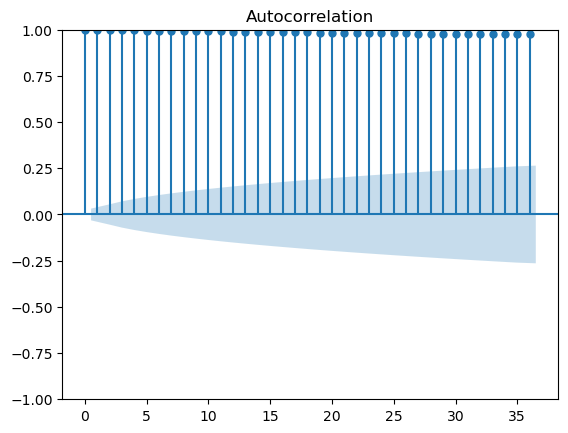

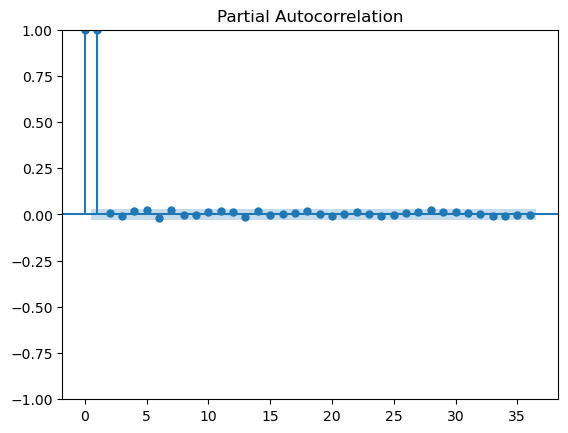

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3797
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14625.993
Date:                Sun, 05 Jan 2025   AIC                          29263.987
Time:                        12:57:05   BIC                          29301.437
Sample:                             0   HQIC                         29277.297
                               - 3797                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0307      0.005     -5.709      0.000      -0.041      -0.020
ar.L2         -0.0135      0.012     -1.084      0.278      -0.038       0.011
ar.L3         -0.0186      0.014     -1.336      0.1

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


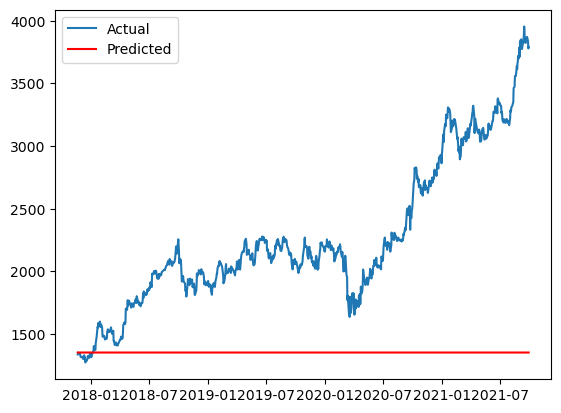

In [26]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Split the data into training and test sets
train = data['Close'][:int(0.8*len(data))]
test = data['Close'][int(0.8*len(data)):]

# Plot ACF and PACF to determine the order of AR and MA terms
plot_acf(train)
plot_pacf(train)
plt.show()

# Fit the ARIMA model (p, d, q) based on ACF and PACF
model = ARIMA(train, order=(5,1,0))  # Example parameters, adjust based on ACF/PACF analysis
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make predictions
forecast = model_fit.forecast(steps=len(test))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Predicted', color='red')
plt.legend()
plt.show()


In [ ]:
Step 4:LSTM Model for Forecasting

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 0.0037
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 4.3175e-05
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 4.4884e-05
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 3.8795e-05
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 4.5709e-05
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 3.8264e-05
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 4.7707e-05
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 3.7299e-05
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 4.1348e-05
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 3.8922e-05
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


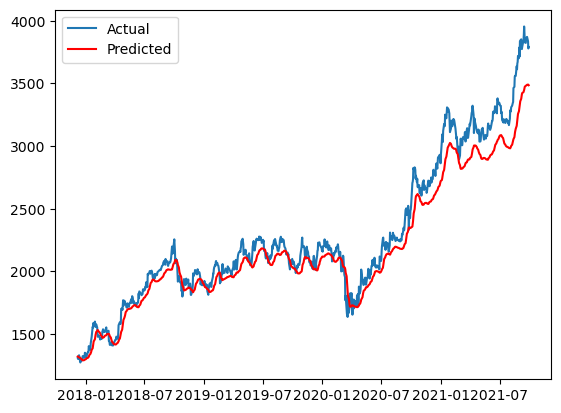

In [28]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Rescale the data (important for LSTM)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare the data for LSTM (use the past 60 days to predict the next day)
X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape X to be 3D for LSTM [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict future stock prices
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted', color='red')
plt.legend()
plt.show()


In [ ]:
Step 5:Model Evaluation

In [30]:
from sklearn.metrics import mean_squared_error

# Evaluate ARIMA model performance
arima_rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"ARIMA RMSE: {arima_rmse}")

# Evaluate LSTM model performance
lstm_rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"LSTM RMSE: {lstm_rmse}")


ARIMA RMSE: 1085.749196250407
LSTM RMSE: 2227.713403219043


It looks like the ARIMA model has performed better than the LSTM model in terms of RMSE (Root Mean Squared Error). 

ARIMA Model Performance
1.RMSE (1085.75): The ARIMA model is giving relatively lower RMSE, which suggests it is doing a better job at capturing the time series patterns (like trends and seasonality) in this case.
2.ARIMA works well for time series that are stationary (or made stationary through differencing). It may be more appropriate for financial data like stock prices that exhibit consistent trends or cycles.

LSTM Model Performance
1.RMSE (2227.71): The LSTM model, which is a deep learning model, has a higher RMSE. This could mean the model isn't learning as effectively from the data in this case.
2.LSTM models generally require large amounts of data and fine-tuning (including hyperparameters like the number of layers, units, epochs, and batch size) to achieve optimal performance. In addition, stock prices can be noisy, which might make it harder for LSTM models to generalize without extensive tuning.